# Datasets description

dataset:
three dataset:
first:
y: close price, x : all news parameters and extra info
file: close_all_news_extra check
second:
y: close price, x : three news parameters and extra info
file: close_three_news_extra check 
third:
y: close price - open price, x : all news parameters and extra info
file: different_all_news_extra
fourth:
y: close price - open price, x :  three news parameters and extra info
file: different_three_news_extra check

In [40]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn import datasets, linear_model, preprocessing
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
import sklearn.linear_model
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA
from sklearn import svm
import tensorflow as tf
from tensorflow import keras
import numpy.random as r
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
from keras import regularizers
from keras import optimizers
import keras.backend as K
K.clear_session()

In [7]:
close_all_news_extra = pd.read_csv("close_all_news_extra.csv")
close_all_news_extra = close_all_news_extra.drop(columns= ["appear"])

close_three_news_extra = pd.read_csv("close_three_news_extra.csv")
close_three_news_extra = close_three_news_extra.drop(columns= ["appearence"])

different_all_news_extra = pd.read_csv("different_all_news_extra.csv")
different_all_news_extra = different_all_news_extra.drop(columns= ["appear"])

different_three_news_extra = pd.read_csv("different_three_news_extra.csv")
different_three_news_extra = different_three_news_extra.drop(columns= ["appearence"])

print(different_all_news_extra.shape)
print(close_all_news_extra.shape)

(658, 40)
(658, 40)


In [8]:
xx = [1,2,3,4,5]
yy = [1,2,3,4,5]
a,b,c,d = train_test_split(xx,yy, shuffle = False)
print(a)
print(b)
print(c)
print(d)

[1, 2, 3]
[4, 5]
[1, 2, 3]
[4, 5]


In [9]:
close_all_news_extra.columns

Index(['Unnamed: 0', 'Euro exchange rate', 'Date', 'Hong Kong exchange rate',
       'Canada exchange rate', 'China exchange rate', 'QCOM close price',
       'MSFT close price', 'TXN close price', 'APPL close price',
       'social_media', 'computer', 'business', 'programming', 'hearing',
       'urban', 'shopping', 'science', 'work', 'valuable', 'fashion',
       'technology', 'competing', 'economics', 'office', 'cheerfulness',
       'optimism', 'celebration', 'trust', 'positive_emotion', 'hate',
       'aggression', 'horror', 'suffering', 'ridicule', 'irritability',
       'deception', 'disappointment', 'negative_emotion', 'nervousness'],
      dtype='object')

In [10]:
close_three_news_extra.columns

Index(['Unnamed: 0', 'Euro exchange rate', 'Date', 'Hong Kong exchange rate',
       'Canada exchange rate', 'China exchange rate', 'QCOM close price',
       'MSFT close price', 'TXN close price', 'APPL close price',
       'new_correlation', 'pos_re', 'neg_re'],
      dtype='object')

In [11]:
def plot(test, prediction, num, title):
    plt.plot(num, prediction, 'r-', label = "prediction")
    plt.plot(num, test, 'b-', label ="real value")
    plt.title(title)
    plt.legend(loc = "upper right")
    plt.show()

In [12]:
# pull out the y and x, and transfer into dataset:
def transfer_dataframe_to_x_y(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    y = y.reshape(y.shape[0],1)
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

# Linear Regression models
now we have a table that:
        redge degree:   0, 0.35, 0.5, 0.75
        polynomial degree: 1, 2


In [13]:
X_close_three_news_extra,Y_close_three_news_extra = transfer_dataframe_to_x_y(close_three_news_extra,"APPL close price")
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y(different_three_news_extra,"APPL diff")
X_close_all_news_extra, Y_close_all_news_extra = transfer_dataframe_to_x_y(close_all_news_extra,"APPL close price")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y(different_all_news_extra,"APPL diff")
print()

In [14]:
def linear_fit(X_train, X_test, Y_train, Y_test, alpha):
    ridge = Ridge(alpha)
    ridge.fit(X_train,Y_train)
    train_error = (1/Y_train.shape[0])*np.sum((Y_train-ridge.predict(X_train))**2)
    test_error = (1/Y_test.shape[0])*np.sum((Y_test-ridge.predict(X_test))**2)
    R2 = 1 - np.sum((Y_train - ridge.predict(X_train))**2) / np.sum((Y_train - np.mean(Y_train))**2)
    return train_error, test_error, R2, ridge

In [15]:
def model_selection(X, Y):
    deg_list = [1,2,3,4,5]
    alpha_list = [0,0.35,0.5,0.75]
    mse_tr = []
    mse_test = []
    for elem in deg_list:
        temp_mse_tr = None
        temp_mse_test = None
        if elem != 1:
    #         print(elem)
            poly = PolynomialFeatures(int(elem))
            X_poly = poly.fit_transform(X)
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
        else:
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size=0.3)            
        for alpha in alpha_list:
            print("This is alpha: ", alpha)
            print()
#             print(alpha)
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
#             print("train_error: ", train_error, "alpha: ", alpha)
#             print("before condition: ", temp_mse_tr)
            print("this is test error:", test_error)
            if temp_mse_tr is None:
                temp_mse_tr = (train_error, float(alpha))
                
            elif temp_mse_tr[0] > train_error:
#                 print("updating: ", alpha)
                temp_mse_tr = (train_error, float(alpha))
            
                
            if temp_mse_test is None:
                temp_mse_test = (test_error, float(alpha))
               
            elif temp_mse_test[0] > test_error:
                temp_mse_test = (test_error, float(alpha))
               
        mse_tr.append(temp_mse_tr)  
        mse_test.append(temp_mse_test) 
        
            
    return mse_tr, mse_test

In [16]:
a, b = model_selection(X_close_three_news_extra,Y_close_three_news_extra)

This is alpha:  0

this is test error: 58.47296841133638
This is alpha:  0.35

this is test error: 70.47312240065743
This is alpha:  0.5

this is test error: 72.60395828007744
This is alpha:  0.75

this is test error: 75.82774329365954
This is alpha:  0

this is test error: 5.217897641065488e+18
This is alpha:  0.35

this is test error: 38.007335320188496
This is alpha:  0.5

this is test error: 37.7822535564621
This is alpha:  0.75

this is test error: 37.52417299544118
This is alpha:  0

this is test error: 1.9006198259883154e+20
This is alpha:  0.35

this is test error: 10180.436147463668
This is alpha:  0.5

this is test error: 15361.28728891043
This is alpha:  0.75

this is test error: 19643.50293924179
This is alpha:  0

this is test error: 27.675356735400847
This is alpha:  0.35

this is test error: 27.675356735400847
This is alpha:  0.5

this is test error: 27.675356735400847
This is alpha:  0.75

this is test error: 27.675356735400847
This is alpha:  0

this is test error: 25.

In [17]:
print(a)
print(b)

[(61.39554315873353, 0.0), (11.363771280162307, 0.0), (1.141200646202974, 0.0), (26.48801085056858, 0.0), (18.289525324142755, 0.0)]
[(58.47296841133638, 0.0), (37.52417299544118, 0.75), (10180.436147463668, 0.35), (27.675356735400847, 0.0), (25.046151185600973, 0.0)]


In [18]:
a, b = model_selection(X_close_all_news_extra,Y_close_all_news_extra)

This is alpha:  0

this is test error: 95.53781444945847
This is alpha:  0.35

this is test error: 72.40194653127476
This is alpha:  0.5

this is test error: 75.1739731616129
This is alpha:  0.75

this is test error: 79.29978519595753
This is alpha:  0

this is test error: 34.664142695856484
This is alpha:  0.35

this is test error: 18.15842500441037
This is alpha:  0.5

this is test error: 18.15576363099224
This is alpha:  0.75

this is test error: 18.423197937623396
This is alpha:  0

this is test error: 19.86606990179927
This is alpha:  0.35

this is test error: 24.532325084857906
This is alpha:  0.5

this is test error: 22.779009085384832
This is alpha:  0.75

this is test error: 23.26610133640067
This is alpha:  0

this is test error: 68.00242000339706
This is alpha:  0.35

this is test error: 68.00242000339706
This is alpha:  0.5

this is test error: 68.00242000339706
This is alpha:  0.75

this is test error: 68.00242000339706
This is alpha:  0

this is test error: 13.51332499392

In [19]:
print(a)
print(b)

[(46.767279315533756, 0.0), (17.703621872184545, 0.0), (11.907590965671139, 0.0), (10.89717642159918, 0.0), (5.980901488945544, 0.0)]
[(72.40194653127476, 0.35), (18.15576363099224, 0.5), (19.86606990179927, 0.0), (68.00242000339706, 0.0), (13.513324993928808, 0.0)]


In [20]:
def plot_model_sel(X,Y,alpha):

    deg_list = [1,2,3,4,5]
    mse_tr = []
    mse_test = []
    for elem in deg_list:
        temp_mse_tr = None
        temp_mse_test = None
        if elem == 1:
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X, Y, test_size=0.25)
#             print("this is test_poly")
#             print(X_test_poly)
            
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
            mse_tr.append(train_error)
            mse_test.append(test_error)
        else:
            poly = PolynomialFeatures(int(elem))
            X_poly = poly.fit_transform(X)
            Y_poly = Y
            X_train_poly, X_test_poly, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.25)
#             print("this is test_poly")
#             print(X_test_poly)            
            train_error, test_error, R2, ridge = linear_fit(X_train_poly, X_test_poly, Y_train_poly, Y_test_poly, float(alpha))
            mse_tr.append(train_error)
            mse_test.append(test_error)
    print(mse_test)
    plt.plot(deg_list, mse_tr, "r-", label = "train_mse")
    plt.plot(deg_list, mse_test, "b-", label = "test_mse")
    plt.xlabel("Model order")
    plt.ylabel("MSE")
    plt.grid()
    plt.ylim(0,300)
    plt.title("degree 2, ridge 0.75")
    plt.legend(loc = "upper right")
    plt.show()
    

[77.17069906511854, 700.1478364062541, 123.334110139855, 99.50601428144701, 56.607179484077086]


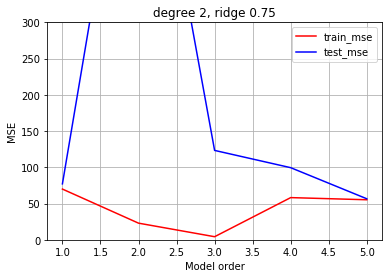

In [21]:
plot_model_sel(X_close_three_news_extra,Y_close_three_news_extra, 0.35)

[66.39200784206312, 21.308319483025183, 385.8910618045867, 10.336002573976199, 46.13546170813638]


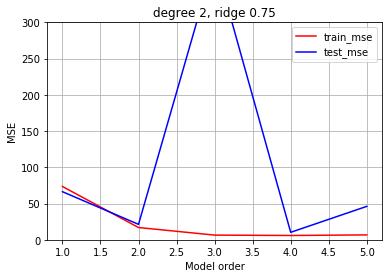

In [22]:
plot_model_sel(X_close_all_news_extra,Y_close_all_news_extra, 0.35)

In [23]:
def linear_regression_model(X, Y, degree, alpha, start, end):
    # dataset poly transfor:
    poly = PolynomialFeatures(int(alpha))
    X_poly = poly.fit_transform(X)
    Y_poly = Y
    y_plot = Y[int(start):int(end)]
    x_plot = X[int(start):int(end)]
    x_plot2 = X_poly[int(start):int(end)]
    y_plot2 = Y_poly[int(start):int(end)]
    

    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    X_train_poly, X_test_ploy, Y_train_poly, Y_test_poly = train_test_split(X_poly, Y_poly, test_size=0.3)
    num = np.arange(len(X_test))
    # non poly, non redge:
    train_error, test_error, R2,ridge = linear_fit(X_train, X_test, Y_train, Y_test,0)
    prediction = ridge.predict(x_plot)
    
    num = np.arange(len(x_plot))
    plot(y_plot, prediction, num, "2 poly, 0.75 ridge")
    print( str(degree) + " poly," + str(alpha) + "non redge: train_error = {0:.2f} and test_error = {1:.2f}, r^2 = {2:.2f}".format(train_error,test_error,R2))
    

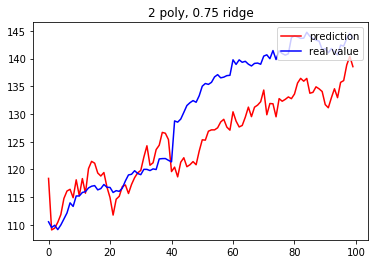

2 poly,0.35non redge: train_error = 57.46 and test_error = 69.17, r^2 = 0.80


In [24]:
linear_regression_model(X_close_three_news_extra,Y_close_three_news_extra,2,0.35, 500, 600)

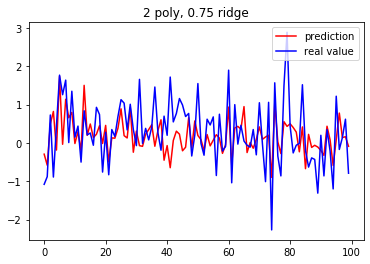

2 poly,0.75non redge: train_error = 1.44 and test_error = 1.08, r^2 = 0.20


In [25]:
linear_regression_model(X_different_three_news_extra,Y_different_three_news_extra,2, 0.75, 500, 600)

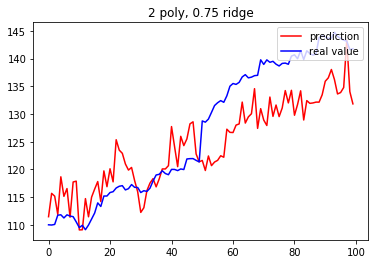

2 poly,0.35non redge: train_error = 45.39 and test_error = 152.47, r^2 = 0.84


In [26]:
linear_regression_model(X_close_all_news_extra,Y_close_all_news_extra,2,0.35, 500, 600)

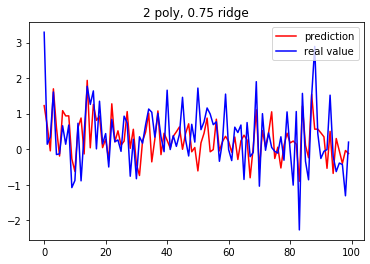

2 poly,0.75non redge: train_error = 1.28 and test_error = 1.75, r^2 = 0.33


In [27]:
linear_regression_model(X_different_all_news_extra,Y_different_all_news_extra,2,0.75, 500, 600)

# SVM models

Before process the SVM models, we need to transfer the y to 1 or -1

In [28]:
def transfer_y_binary(value):
    if value < 0:
        out = -1
    else:
        out = 1
    return out

In [29]:
def transfer_dataframe_to_x_y_for_SVM(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

In [30]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary)

In [31]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")


We need three kernals, with mutiple c as soft margin. <br>
kernal one: linear <br>
kernal two: RBF <br>
kernal three: Polynomial Kernel <br>

## SVM_linear

In [59]:
acc_train_svm_linear = []
acc_test_svm_linear = []
svm_linear_f1_score = []
svm_linear_auc = []
c_svm_linear = []

In [61]:
def svm_linear(X_train, X_test, Y_train, Y_test,c):
    svc_linear = svm.SVC(probability = False, kernel = "linear", C = c)
    
    svc_linear.fit(X_train,Y_train)
    Yhat_svc_linear_train = svc_linear.predict(X_train)
    acc_train = np.mean(Yhat_svc_linear_train == Y_train)
    
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))

    
    Yhat_svc_linear_test = svc_linear.predict(X_test)
    acc_test = np.mean(Yhat_svc_linear_test == Y_test)
    
    
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    
    f1 = f1_score(Y_test, Yhat_svc_linear_test)
    svm_linear_f1_score.append(f1)
    print('f1 score = {0:f}'.format(f1))
    
    fpr, tpr, thresholds = roc_curve(Y_test, Yhat_svc_linear_test)
    auc_linear = auc(fpr, tpr)
    svm_linear_auc.append(auc_linear)
    print('auc = {0:f}'.format(auc_linear))
    
    
    
    c_svm_linear.append(c)

In [62]:
acc_train_svm_linear

[]

In [63]:
def plot_svm(c_svm_linear, acc_train_svm_linear, acc_test_svm_linear):
    
    plt.plot(c_svm_linear,acc_train_svm_linear,'g.-',label='train accuracy')
    plt.plot(c_svm_linear,acc_test_svm_linear,'r.-',label='test accuracy')
    plt.legend(loc='upper right')
    plt.show()
    plt.clf()
    plt.cla()
    plt.close()


In [64]:
def SVM_linear(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_linear(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_linear, acc_train_svm_linear, acc_test_svm_linear)
    print("done printing")

In [65]:
cVals = list(np.arange(0.001,2,0.05))
print(cVals)

[0.001, 0.051000000000000004, 0.101, 0.15100000000000002, 0.201, 0.251, 0.30100000000000005, 0.35100000000000003, 0.401, 0.451, 0.501, 0.551, 0.6010000000000001, 0.651, 0.7010000000000001, 0.751, 0.801, 0.8510000000000001, 0.901, 0.9510000000000001, 1.001, 1.051, 1.101, 1.151, 1.201, 1.251, 1.301, 1.351, 1.401, 1.451, 1.501, 1.551, 1.601, 1.651, 1.701, 1.751, 1.801, 1.851, 1.901, 1.951]


0.001
Train Accuracy = 0.559471
Test Accuracy = 0.487179
f1 score = 0.655172
auc = 0.500000
0.501
Train Accuracy = 0.685022
Test Accuracy = 0.610256
f1 score = 0.672414
auc = 0.615526
1.001
Train Accuracy = 0.696035
Test Accuracy = 0.600000
f1 score = 0.657895
auc = 0.604737
1.501
Train Accuracy = 0.693833
Test Accuracy = 0.605128
f1 score = 0.666667
auc = 0.610263
2.001
Train Accuracy = 0.691630
Test Accuracy = 0.605128
f1 score = 0.663755
auc = 0.610000
2.501
Train Accuracy = 0.689427
Test Accuracy = 0.600000
f1 score = 0.660870
auc = 0.605000
3.001
Train Accuracy = 0.702643
Test Accuracy = 0.610256
f1 score = 0.663717
auc = 0.614737
3.501
Train Accuracy = 0.698238
Test Accuracy = 0.620513
f1 score = 0.678261
auc = 0.625526
4.001
Train Accuracy = 0.696035
Test Accuracy = 0.615385
f1 score = 0.672489
auc = 0.620263
4.501
Train Accuracy = 0.689427
Test Accuracy = 0.594872
f1 score = 0.658009
auc = 0.600000


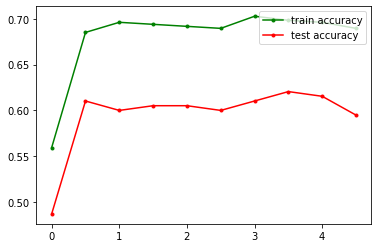

done printing


In [66]:

SVM_linear(X_different_three_news_extra,Y_different_three_news_extra)


In [68]:
def pca(X, k):
    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=k)
    lst = []
    for i in range(k):
        name = "principal component " + str(i + 1)
        lst.append(name)

    principalComponents = pca.fit_transform(X)
    
    print(sum(pca.explained_variance_ratio_))
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = lst)
    return principalDf
x_diff_three_pca = pca(X_different_three_news_extra, 5)

0.8721466850979696


0.001
Train Accuracy = 0.577093
Test Accuracy = 0.605128
f1 score = 0.733564
auc = 0.563509
0.501
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
1.001
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
1.501
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
2.001
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
2.501
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
3.001
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
3.501
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
4.001
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858
4.501
Train Accuracy = 0.669604
Test Accuracy = 0.620513
f1 score = 0.660550
auc = 0.614858


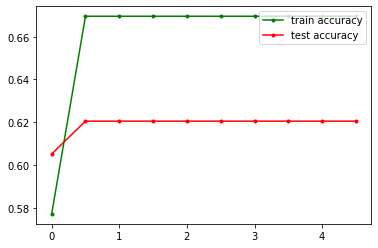

done printing


In [69]:

acc_train_svm_linear = []
acc_test_svm_linear = []
svm_linear_f1_score = []
svm_linear_auc = []
c_svm_linear = []
SVM_linear(x_diff_three_pca,Y_different_three_news_extra)

0.001
Train Accuracy = 0.532609
Test Accuracy = 0.550505
f1 score = 0.710098
auc = 0.500000
0.501
Train Accuracy = 0.652174
Test Accuracy = 0.676768
f1 score = 0.670103
auc = 0.685806
1.001
Train Accuracy = 0.645652
Test Accuracy = 0.686869
f1 score = 0.696078
auc = 0.690857
1.501
Train Accuracy = 0.643478
Test Accuracy = 0.702020
f1 score = 0.709360
auc = 0.706680
2.001
Train Accuracy = 0.645652
Test Accuracy = 0.707071
f1 score = 0.718447
auc = 0.710236
2.501
Train Accuracy = 0.652174
Test Accuracy = 0.707071
f1 score = 0.723810
auc = 0.708174
3.001
Train Accuracy = 0.645652
Test Accuracy = 0.707071
f1 score = 0.718447
auc = 0.710236
3.501
Train Accuracy = 0.645652
Test Accuracy = 0.707071
f1 score = 0.723810
auc = 0.708174
4.001
Train Accuracy = 0.652174
Test Accuracy = 0.707071
f1 score = 0.721154
auc = 0.709205
4.501
Train Accuracy = 0.656522
Test Accuracy = 0.696970
f1 score = 0.714286
auc = 0.697969


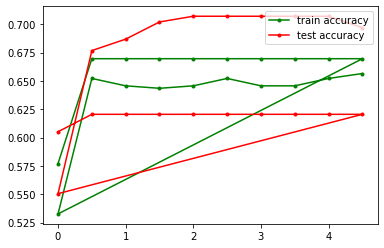

done printing


In [70]:
SVM_linear(X_different_all_news_extra,Y_different_all_news_extra)

0.7355843419481973
0.001
Train Accuracy = 0.554348
Test Accuracy = 0.575758
f1 score = 0.718121
auc = 0.538462
0.501
Train Accuracy = 0.656522
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
1.001
Train Accuracy = 0.656522
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
1.501
Train Accuracy = 0.658696
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
2.001
Train Accuracy = 0.658696
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
2.501
Train Accuracy = 0.656522
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
3.001
Train Accuracy = 0.658696
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
3.501
Train Accuracy = 0.656522
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
4.001
Train Accuracy = 0.658696
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773
4.501
Train Accuracy = 0.658696
Test Accuracy = 0.656566
f1 score = 0.673077
auc = 0.656773


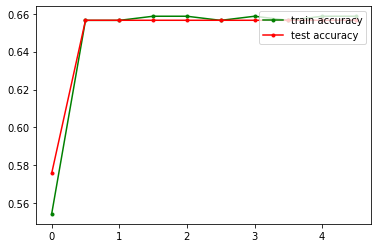

done printing


In [71]:
x_all_three_pca = pca(X_different_all_news_extra, 5)
acc_train_svm_linear = []
acc_test_svm_linear = []
svm_linear_f1_score = []
svm_linear_auc = []
c_svm_linear = []
SVM_linear(x_all_three_pca,Y_different_all_news_extra)

## SVM with RBF

In [87]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
svm_rbf_f1_score = []
svm_rbf_auc = []

In [88]:
def svm_rbf(X_train, X_test, Y_train, Y_test,c):
    svc_rbf = svm.SVC(probability = False, kernel = "rbf", C = c)
    
    svc_rbf.fit(X_train,Y_train)
    Yhat_svc_rbf_train = svc_rbf.predict(X_train)
    acc_train = np.mean(Yhat_svc_rbf_train == Y_train)
    
    acc_train_svm_rbf.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_rbf_test = svc_rbf.predict(X_test)
    acc_test = np.mean(Yhat_svc_rbf_test == Y_test)
    
    acc_test_svm_rbf.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    f1 = f1_score(Y_test, Yhat_svc_rbf_test)
    svm_rbf_f1_score.append(f1)
    print('f1 score = {0:f}'.format(f1))
    
    fpr, tpr, thresholds = roc_curve(Y_test, Yhat_svc_rbf_test)
    auc_rbf = auc(fpr, tpr)
    svm_rbf_auc.append(auc_rbf)
    print('auc = {0:f}'.format(auc_rbf))
    
    c_svm_rbf.append(c)

In [89]:
def SVM_rbf(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_rbf(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_rbf,acc_train_svm_rbf,acc_test_svm_rbf)

0.001
Train Accuracy = 0.535242
Test Accuracy = 0.543590
f1 score = 0.704319
auc = 0.500000
0.501
Train Accuracy = 0.821586
Test Accuracy = 0.471795
f1 score = 0.579592
auc = 0.452883
1.001
Train Accuracy = 0.843612
Test Accuracy = 0.487179
f1 score = 0.545455
auc = 0.479648
1.501
Train Accuracy = 0.850220
Test Accuracy = 0.476923
f1 score = 0.532110
auc = 0.470214
2.001
Train Accuracy = 0.861233
Test Accuracy = 0.476923
f1 score = 0.536364
auc = 0.469313
2.501
Train Accuracy = 0.885463
Test Accuracy = 0.461538
f1 score = 0.524887
auc = 0.453360
3.001
Train Accuracy = 0.887665
Test Accuracy = 0.461538
f1 score = 0.529148
auc = 0.452459
3.501
Train Accuracy = 0.889868
Test Accuracy = 0.471795
f1 score = 0.538117
auc = 0.462794
4.001
Train Accuracy = 0.898678
Test Accuracy = 0.466667
f1 score = 0.535714
auc = 0.457176
4.501
Train Accuracy = 0.905286
Test Accuracy = 0.471795
f1 score = 0.542222
auc = 0.461893


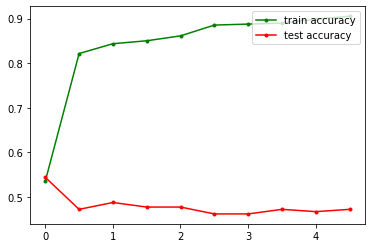

In [90]:
SVM_rbf(X_different_three_news_extra,Y_different_three_news_extra)

0.8721466850979693
0.001
Train Accuracy = 0.541850
Test Accuracy = 0.528205
f1 score = 0.691275
auc = 0.500000
0.501
Train Accuracy = 0.704846
Test Accuracy = 0.661538
f1 score = 0.715517
auc = 0.652913
1.001
Train Accuracy = 0.707048
Test Accuracy = 0.646154
f1 score = 0.698690
auc = 0.638350
1.501
Train Accuracy = 0.711454
Test Accuracy = 0.630769
f1 score = 0.681416
auc = 0.623786
2.001
Train Accuracy = 0.720264
Test Accuracy = 0.641026
f1 score = 0.687500
auc = 0.634656
2.501
Train Accuracy = 0.729075
Test Accuracy = 0.641026
f1 score = 0.684685
auc = 0.635236
3.001
Train Accuracy = 0.729075
Test Accuracy = 0.635897
f1 score = 0.675799
auc = 0.630962
3.501
Train Accuracy = 0.731278
Test Accuracy = 0.646154
f1 score = 0.682028
auc = 0.641832
4.001
Train Accuracy = 0.737885
Test Accuracy = 0.641026
f1 score = 0.675926
auc = 0.636978
4.501
Train Accuracy = 0.742291
Test Accuracy = 0.641026
f1 score = 0.672897
auc = 0.637558


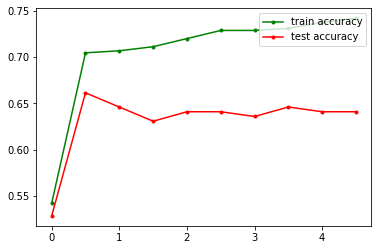

In [91]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
svm_rbf_f1_score = []
svm_rbf_auc = []
X_different_three_news_extra_pca = pca(X_different_three_news_extra, 5)
SVM_rbf(X_different_three_news_extra_pca,Y_different_three_news_extra)

0.001
Train Accuracy = 0.528261
Test Accuracy = 0.560606
f1 score = 0.718447
auc = 0.500000
0.501
Train Accuracy = 0.693478
Test Accuracy = 0.545455
f1 score = 0.625000
auc = 0.527493
1.001
Train Accuracy = 0.697826
Test Accuracy = 0.545455
f1 score = 0.618644
auc = 0.529978
1.501
Train Accuracy = 0.708696
Test Accuracy = 0.550505
f1 score = 0.618026
auc = 0.536968
2.001
Train Accuracy = 0.728261
Test Accuracy = 0.550505
f1 score = 0.618026
auc = 0.536968
2.501
Train Accuracy = 0.739130
Test Accuracy = 0.550505
f1 score = 0.618026
auc = 0.536968
3.001
Train Accuracy = 0.752174
Test Accuracy = 0.545455
f1 score = 0.608696
auc = 0.533706
3.501
Train Accuracy = 0.767391
Test Accuracy = 0.545455
f1 score = 0.601770
auc = 0.536191
4.001
Train Accuracy = 0.771739
Test Accuracy = 0.555556
f1 score = 0.603604
auc = 0.548928
4.501
Train Accuracy = 0.773913
Test Accuracy = 0.555556
f1 score = 0.607143
auc = 0.547686


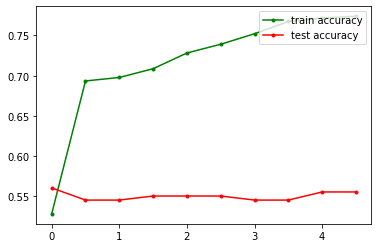

In [92]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []

SVM_rbf(X_different_all_news_extra, Y_different_all_news_extra )

0.7355843389614095
0.001
Train Accuracy = 0.543478
Test Accuracy = 0.525253
f1 score = 0.688742
auc = 0.500000
0.501
Train Accuracy = 0.695652
Test Accuracy = 0.565657
f1 score = 0.650407
auc = 0.554828
1.001
Train Accuracy = 0.689130
Test Accuracy = 0.555556
f1 score = 0.620690
auc = 0.548282
1.501
Train Accuracy = 0.710870
Test Accuracy = 0.535354
f1 score = 0.600000
auc = 0.528539
2.001
Train Accuracy = 0.730435
Test Accuracy = 0.535354
f1 score = 0.603448
auc = 0.528028
2.501
Train Accuracy = 0.732609
Test Accuracy = 0.540404
f1 score = 0.602620
auc = 0.533858
3.001
Train Accuracy = 0.750000
Test Accuracy = 0.535354
f1 score = 0.589286
auc = 0.530074
3.501
Train Accuracy = 0.765217
Test Accuracy = 0.540404
f1 score = 0.591928
auc = 0.535393
4.001
Train Accuracy = 0.765217
Test Accuracy = 0.525253
f1 score = 0.576577
auc = 0.520458
4.501
Train Accuracy = 0.765217
Test Accuracy = 0.530303
f1 score = 0.586667
auc = 0.524755


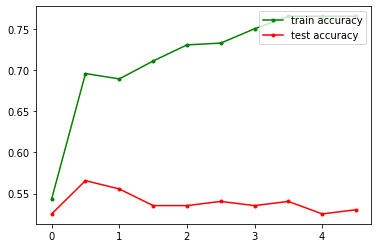

In [93]:
acc_train_svm_rbf = []
acc_test_svm_rbf = []
c_svm_rbf = []
X_different_all_news_extra_pca = pca(X_different_all_news_extra, 5)
SVM_rbf(X_different_all_news_extra, Y_different_all_news_extra )

In [98]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
svm_poly_f1_score = []
svm_poly_auc = []

In [99]:
def svm_poly(X_train, X_test, Y_train, Y_test,c):
    svc_poly = svm.SVC(probability = False, kernel = "poly", C = c)
    
    svc_poly.fit(X_train,Y_train)
    Yhat_svc_poly_train = svc_poly.predict(X_train)
    acc_train = np.mean(Yhat_svc_poly_train == Y_train)
    
    acc_train_svm_poly.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    Yhat_svc_poly_test = svc_poly.predict(X_test)
    acc_test = np.mean(Yhat_svc_poly_test == Y_test)
    
    acc_test_svm_poly.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test))
    
    f1 = f1_score(Y_test, Yhat_svc_poly_test)
    svm_poly_f1_score.append(f1)
    print('f1 score = {0:f}'.format(f1))
    
    fpr, tpr, thresholds = roc_curve(Y_test, Yhat_svc_poly_test)
    auc_poly = auc(fpr, tpr)
    svm_poly_auc.append(auc_poly)
    print('auc = {0:f}'.format(auc_poly))
    
    
    c_svm_poly.append(c)

In [100]:
def SVM_poly(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
    
    cVals = list(np.arange(0.001,5,0.5))

    for c in cVals:
        print(c)
        svm_poly(X_train, X_test, Y_train, Y_test ,c)
    plot_svm(c_svm_poly,acc_train_svm_poly,acc_test_svm_poly)

0.7134981469950756
0.001
Train Accuracy = 0.599119
Test Accuracy = 0.600000
f1 score = 0.731034
auc = 0.557827
0.501
Train Accuracy = 0.656388
Test Accuracy = 0.635897
f1 score = 0.725869
auc = 0.609707
1.001
Train Accuracy = 0.651982
Test Accuracy = 0.630769
f1 score = 0.718750
auc = 0.606043
1.501
Train Accuracy = 0.654185
Test Accuracy = 0.630769
f1 score = 0.718750
auc = 0.606043
2.001
Train Accuracy = 0.651982
Test Accuracy = 0.630769
f1 score = 0.718750
auc = 0.606043
2.501
Train Accuracy = 0.651982
Test Accuracy = 0.630769
f1 score = 0.718750
auc = 0.606043
3.001
Train Accuracy = 0.651982
Test Accuracy = 0.630769
f1 score = 0.718750
auc = 0.606043
3.501
Train Accuracy = 0.651982
Test Accuracy = 0.630769
f1 score = 0.718750
auc = 0.606043
4.001
Train Accuracy = 0.649780
Test Accuracy = 0.625641
f1 score = 0.715953
auc = 0.600361
4.501
Train Accuracy = 0.649780
Test Accuracy = 0.625641
f1 score = 0.715953
auc = 0.600361


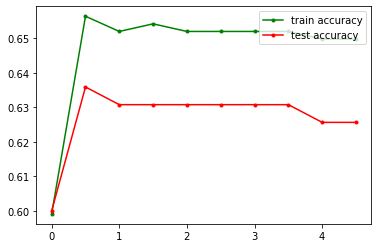

In [101]:
X_different_three_news_extra_pca = pca(X_different_three_news_extra,3)
SVM_poly(X_different_three_news_extra_pca,Y_different_three_news_extra)

0.6472614244648855
0.001
Train Accuracy = 0.597826
Test Accuracy = 0.555556
f1 score = 0.690141
auc = 0.538886
0.501
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
1.001
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
1.501
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
2.001
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
2.501
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
3.001
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
3.501
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
4.001
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376
4.501
Train Accuracy = 0.630435
Test Accuracy = 0.560606
f1 score = 0.685921
auc = 0.545376


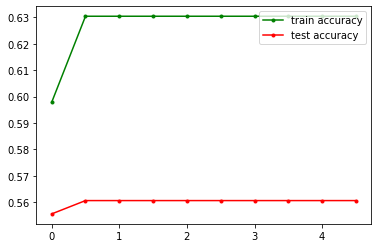

In [103]:
acc_train_svm_poly = []
acc_test_svm_poly = []
c_svm_poly = []
svm_poly_f1_score = []
svm_poly_auc = []
X_different_all_news_extra_pca = pca(X_different_all_news_extra,3)
SVM_poly(X_different_all_news_extra_pca, Y_different_all_news_extra)

# Neural Network models

### non-lib

In [49]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 2))
    for i in range(len(y)):
        if y[i] <= 0:
            y_vect[i][0] = 1
        else:
            y_vect[i][1] = 1
    return y_vect

def f(z):
    return 1 / (1 + np.exp(-z))


def f_deriv(z):
    return f(z) * (1 - f(z))

def setup_and_init_weights(nn_structure):
    W = {} #creating a dictionary i.e. a set of key: value pairs
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1])) #Return “continuous uniform” random floats in the half-open interval [0.0, 1.0). 
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

def feed_forward(x, W, b):
    a = {1: x} # create a dictionary for holding the a values for all levels
    z = { } # create a dictionary for holding the z values for all the layers
    for l in range(1, len(W) + 1): # for each layer
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]  # z^(l+1) = W^(l)*a^(l) + b^(l)
        a[l+1] = f(z[l+1]) # a^(l+1) = f(z^(l+1))
    return a, z

def calculate_out_layer_delta(y, a_out, z_out):
    # delta^(nl) = -(y_i - a_i^(nl)) * f'(z_i^(nl))
    return -(y-a_out) * f_deriv(z_out) 


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            # perform the feed forward pass and return the stored a and z values, to be used in the
            # gradient descent step
            a, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(a^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))# np.newaxis increase the number of dimensions
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/N * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func


def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    print(y)
    return y

In [50]:
# convert y to [1,0] and [0,1]

In [51]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary)

In [52]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")


In [53]:
print(X_different_three_news_extra.shape)

(649, 11)


In [54]:
nn_structure = [11, 12, 2]

nn_structure2 = []

X_train, X_test, Y_train, Y_test = train_test_split(X_different_three_news_extra, Y_different_three_news_extra, test_size=0.3)
Y_V_train = convert_y_to_vect(Y_train)
Y_V_test = convert_y_to_vect(Y_test)
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, Y_V_train, 3000)

# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 3)
print('Prediction accuracy is {}%'.format(accuracy_score(Y_test, y_pred) * 100))

NameError: name 'r' is not defined

### keras lib


In [55]:
def transfer_y_binary_keras(value):
    if value < 0:
        out = 0
    else:
        out = 1
    return out

In [56]:
def transfer_dataframe_to_x_y_for_SVM(dataframe, y_colum):
    #y_dataframe = dataframe[y_colum]
    dataframe = dataframe.dropna()
    y = dataframe[y_colum].values
    x_dataframe = dataframe.drop(columns= [y_colum,"Date"])
    x = x_dataframe.values
    return x,y

In [57]:
different_all_news_extra["APPL diff"] = different_all_news_extra["APPL diff"].apply(transfer_y_binary_keras)
different_three_news_extra["APPL diff"] = different_three_news_extra["APPL diff"].apply(transfer_y_binary_keras)


In [58]:
X_different_three_news_extra,Y_different_three_news_extra = transfer_dataframe_to_x_y_for_SVM(different_three_news_extra,"APPL diff")
X_different_all_news_extra, Y_different_all_news_extra = transfer_dataframe_to_x_y_for_SVM(different_all_news_extra,"APPL diff")
X_different_three_news_extra = StandardScaler().fit_transform(X_different_three_news_extra)
X_different_all_news_extra =  StandardScaler().fit_transform(X_different_all_news_extra)


In [59]:
# passing x, y before separate into train and test
# hidenLayer is hidden layer as list. eg [10,4,2] is three hiden layer with 10 number of Neural etc. 
# activation is activation function
# activity_regularizer is how much to regularizer
### kernel_constraint is for constraint number using 
# optimizer is optimiz function such as sgd
# batch_size is smaple size for each gd renew, 每次梯度更新的样本数
# epochs: number iterations of generation
def nn_classifier(x, y, hidenLayer, activation, regularizer, 
                  optimizer, batch_size, epochs):
    
    model = Sequential()
    n_parameter = x.shape[1]
    model.add(Dense(hidenLayer[0], input_shape = (n_parameter,), activation = activation, name = "hidden",
                   activity_regularizer = regularizers.l2(regularizer)))
    
    if len(hidenLayer) > 1:
        for layer in range(1,len(hidenLayer)):
            name_in = "hidden" + str(layer)
            model.add(Dense(hidenLayer[layer], activation = activation, name = name_in,
                   activity_regularizer = regularizers.l2(regularizer)))
            
    model.add(Dense(1, activation=activation,activity_regularizer = regularizers.l2(regularizer), 
                    name='output'))
    
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

    model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size,verbose=0)

    lossi_Out, Eout = model.evaluate(X_test,Y_test, verbose=0)
    lossi_In, Ein = model.evaluate(X_train,Y_train, verbose=0)
    
    model.summary()
    print()
    print("RESULT: ")
    print("optimizer="+optimizer+", activation=" + activation) 
    print("batch_size=%3d, epoch=%4d, regularizer=%7.5f, loss=%12.4e, Ein=%7.5f, Eout=%7.5f" % (batch_size, 
                                                                                               epochs,
                                                                                               regularizer,
                                                                                               lossi_In,
                                                                                               Ein,
                                                                                               Eout))
    print()
 

In [60]:
K.clear_session()
nn_classifier(X_different_all_news_extra, Y_different_all_news_extra,[20,13],'sigmoid', 0.0001,"rmsprop",600,2000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 20)                780       
_________________________________________________________________
hidden1 (Dense)              (None, 13)                273       
_________________________________________________________________
output (Dense)               (None, 1)                 14        
Total params: 1,067
Trainable params: 1,067
Non-trainable params: 0
_________________________________________________________________

RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=600, epoch=2000, regularizer=0.00010, loss=  4.8264e-01, Ein=0.72433, Eout=0.56061



In [61]:
K.clear_session()
nn_classifier(X_different_three_news_extra, Y_different_three_news_extra,[5],'sigmoid', 0.0001,"rmsprop",600,2000)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 5)                 60        
_________________________________________________________________
output (Dense)               (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________

RESULT: 
optimizer=rmsprop, activation=sigmoid
batch_size=600, epoch=2000, regularizer=0.00010, loss=  5.8335e-01, Ein=0.68208, Eout=0.64615



In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X_different_all_news_extra, Y_different_all_news_extra, test_size=0.3)
print(Y_test)



[0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 1 1 0 1 1 1]
